In [1]:
import xarray
import numpy as np
import pandas
import h5py
import datetime
from ulmo.utils import image_utils
from ulmo.plotting import plotting
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cartopy.feature as cfeature
import os
import matplotlib.ticker as mticker
import healpy as hp

import cartopy
from ulmo.analysis.spatial_plots import evals_to_healpix, evals_to_healpix_stat, show_med_LL

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
# this is going to be my Healpy images

In [3]:
aug10 = xarray.open_dataset('/home/jovyan/20120810120000-STAR-L3S_GHRSST-SSTsubskin-LEO_Daily-ACSPO_V2.80-v02.0-fv01.0.nc')
analysis_table = pandas.read_parquet('/home/jovyan/parquet/SST_L3S_VIIRS_2012.parquet')

In [4]:
eval_tbl = analysis_table
nside = 64
hpma, hp_lons, hp_lats, hp_values = evals_to_healpix_stat(eval_tbl, nside, metric = 'mean_temperature', stat = 'mean')

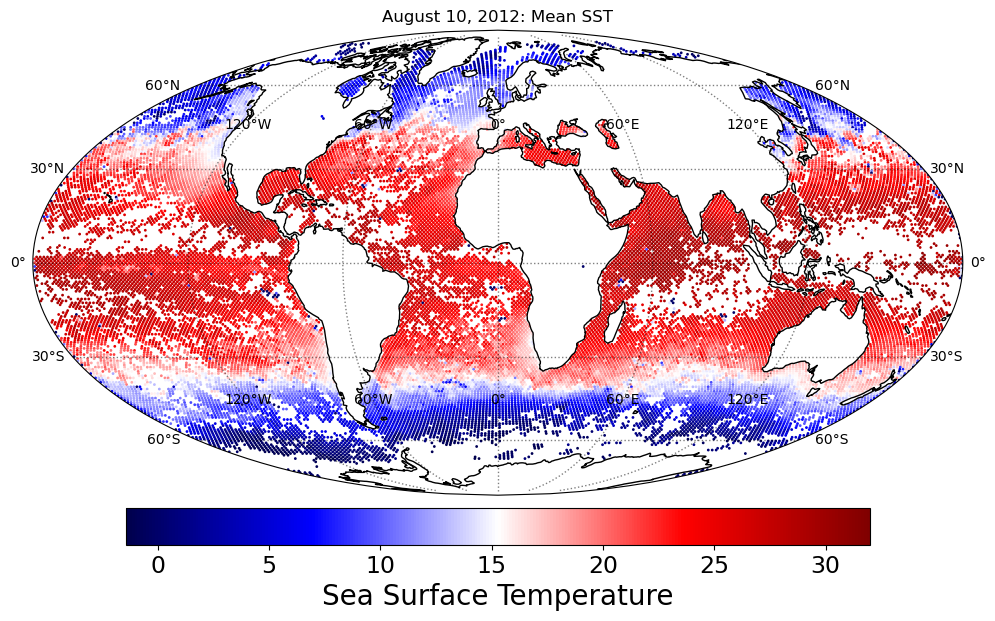

In [5]:
fig = plt.figure(figsize=(12,8))
color='seismic'
plt.clf()

tformM = ccrs.Mollweide()
tformP = ccrs.PlateCarree()

ax = plt.axes(projection=tformM)

cm = plt.get_cmap(color)
good = np.invert(hp_values.mask)
img = plt.scatter(x=hp_lons[good],
    y=hp_lats[good],
    c=hp_values[good],  
    cmap=cm,
    s=1,
    transform=tformP)

cb = plt.colorbar(img, orientation='horizontal', pad=0.02, shrink = 0.8)
clbl = 'Sea Surface Temperature'
cb.set_label(clbl, fontsize=20.)
cb.ax.tick_params(labelsize=17)
ax.coastlines(zorder=10)
ax.set_global()
    
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1,
                  color='black', alpha=0.5, linestyle=':', draw_labels=True)

gl.top_labels = True
gl.left_labels = True
gl.right_labels = True
gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black'}
gl.ylabel_style = {'color': 'black'}
plt.title("August 10, 2012: Mean SST")

plt.show()

#save_dir = os.path.expanduser('~/plots')
#save_filename = os.path.join(save_dir, 'plot1.png')

#plt.savefig(save_filename, dpi=300, bbox_inches='tight')
#plt.close(fig)

In [16]:
table_2012 = pandas.read_parquet('/home/jovyan/parquet/SST_L3S_VIIRS_2012.parquet')
table_2013 = pandas.read_parquet('/home/jovyan/parquet/SST_L3S_VIIRS_2013.parquet')
table_2014 = pandas.read_parquet('/home/jovyan/parquet/SST_L3S_VIIRS_2014.parquet')
table_2015 = pandas.read_parquet('/home/jovyan/parquet/SST_L3S_VIIRS_2015.parquet')
table_2016 = pandas.read_parquet('/home/jovyan/parquet/SST_L3S_VIIRS_2016.parquet')
table_2017 = pandas.read_parquet('/home/jovyan/parquet/SST_L3S_VIIRS_2017.parquet')
table_2018 = pandas.read_parquet('/home/jovyan/parquet/SST_L3S_VIIRS_2018.parquet')
table_2019 = pandas.read_parquet('/home/jovyan/parquet/SST_L3S_VIIRS_2019.parquet')
table_2020 = pandas.read_parquet('/home/jovyan/parquet/SST_L3S_VIIRS_2020.parquet')

table_all = pandas.concat([table_2012, table_2013, table_2014, table_2015,
                        table_2016, table_2017, table_2018, table_2019, table_2020])
table_all.reset_index(drop=True, inplace=True)

In [17]:
eval_tbl = table_all
hpma, hp_lons, hp_lats, hp_values = evals_to_healpix_stat(eval_tbl, nside, metric = 'mean_temperature', stat = 'median')
# returns evts, hp_lons, hp_lats, meds
# I think I want to plot evts

/tmp/ipykernel_116/1702326997.py:3: RuntimeWarning: divide by zero encountered in log
  hpma_log = np.log(hpma_mask)


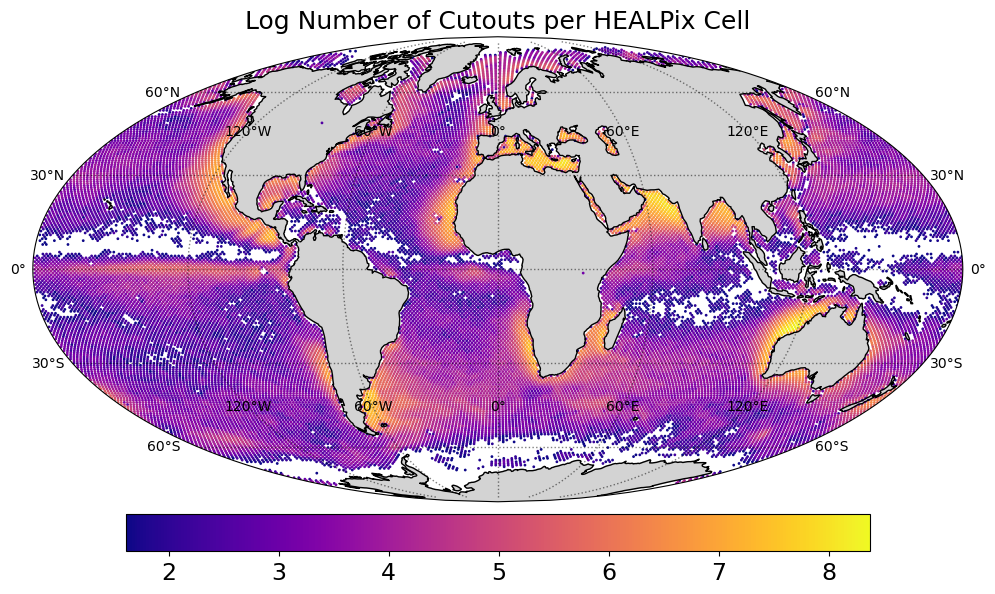

In [18]:
mask_less_than_5 = hpma < 5
hpma_mask = np.ma.masked_where(mask_less_than_5, hpma)
hpma_log = np.log(hpma_mask)

# Plot the Healpy map with the default cartopy color scale
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.Mollweide())

cm = plt.get_cmap('plasma')
good = np.invert(hpma_log.mask)
img = plt.scatter(
    x=hp_lons[good],
    y=hp_lats[good],
    c=hpma_log[good],
    cmap=cm,
    s=1,
    transform=ccrs.PlateCarree()
)

# Create a new color bar associated with the log-transformed data
cb = plt.colorbar(img, orientation='horizontal', pad=0.02, shrink=0.8)
cb.ax.tick_params(labelsize=17)

# Add coastlines and other map features
ax.coastlines(zorder=10)
ax.add_feature(cfeature.LAND, color='lightgray', zorder=0)
ax.set_global()

gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle=':', draw_labels=True)
gl.top_labels = True
gl.left_labels = True
gl.right_labels = True
gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black'}
gl.ylabel_style = {'color': 'black'}

plt.title("Log Number of Cutouts per HEALPix Cell", fontsize=18)
plt.show()
#save_dir = os.path.expanduser('~/plots')
#save_filename = os.path.join(save_dir, 'plotnumberofcutouts.png')

#plt.savefig(save_filename, dpi=300, bbox_inches='tight')
#plt.close(fig)

# THIS IS CURRENTLY JUST 2012, so THERE ARE A LOT MASKED W LESS THAN 5, e^6 seems like a lot near coasts though

In [26]:
hpma, hp_lons, hp_lats, LL_values = evals_to_healpix_stat(eval_tbl, nside, metric = 'LL', stat = 'median')
hpma, hp_lons, hp_lats, viirs_LL_values = evals_to_healpix_stat(eval_tbl, nside, metric = 'VIIRS_LL', stat = 'median')

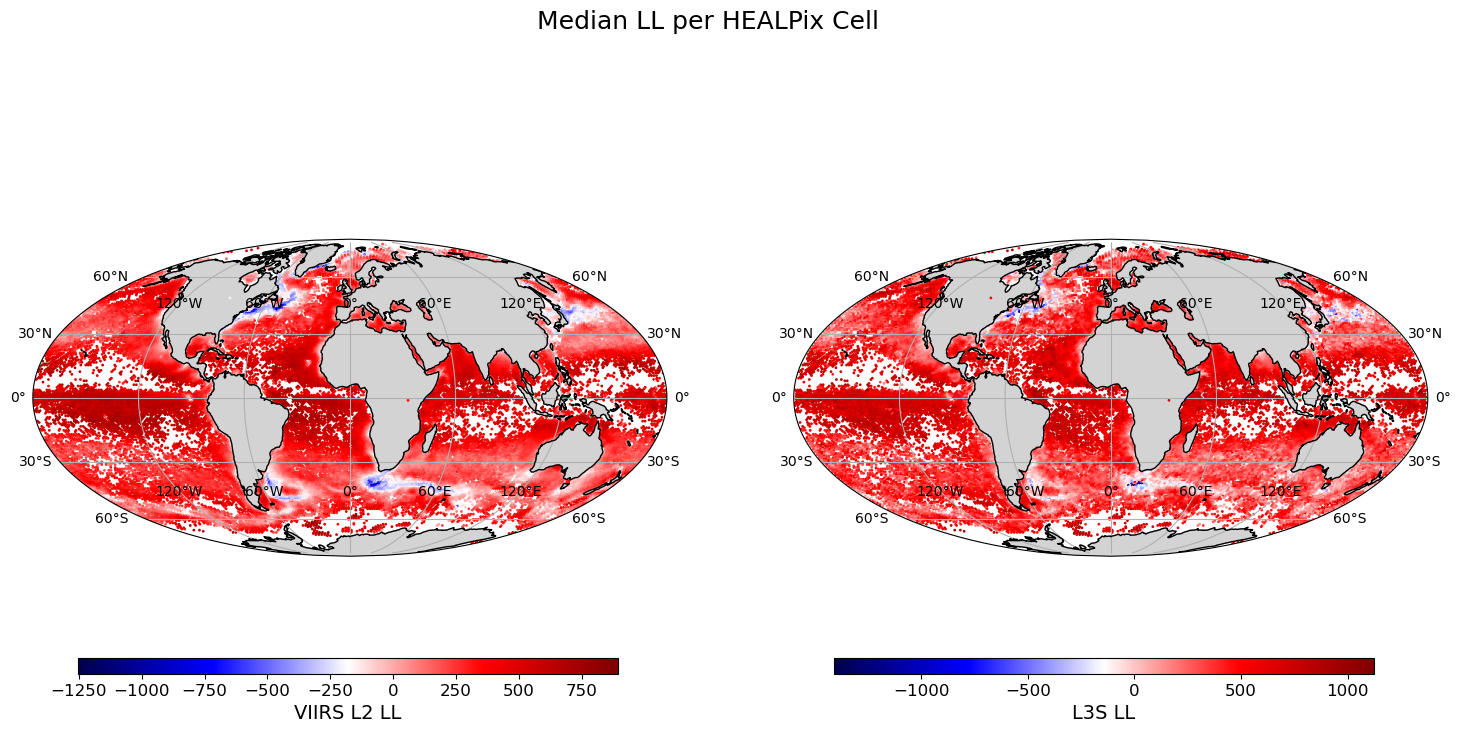

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8), subplot_kw={'projection': ccrs.Mollweide()})

cm = plt.get_cmap('seismic')
good_viirs_ll = np.invert(viirs_LL_values.mask)
img_viirs_ll = axes[0].scatter(
    x=hp_lons[good],
    y=hp_lats[good],
    c=viirs_LL_values[good],
    cmap=cm,
    s=1,
    transform=ccrs.PlateCarree()
)
axes[0].coastlines(zorder=10)
axes[0].add_feature(cfeature.LAND, color='lightgray', zorder=0)
axes[0].set_global()
axes[0].gridlines(draw_labels=True)

cm = plt.get_cmap('seismic')
good_ll = np.invert(LL_values.mask)
img_ll = axes[1].scatter(
    x=hp_lons[good],
    y=hp_lats[good],
    c=LL_values[good],
    cmap=cm,
    s=1,
    transform=ccrs.PlateCarree()
)
axes[1].coastlines(zorder=10)
axes[1].add_feature(cfeature.LAND, color='lightgray', zorder=0)
axes[1].set_global()
axes[1].gridlines(draw_labels=True)

# Create colorbars for both plots
cax_viirs_ll = fig.add_axes([0.15, 0.15, 0.3, 0.02])
cbar_viirs_ll = plt.colorbar(img_viirs_ll, cax=cax_viirs_ll, orientation='horizontal')
cbar_viirs_ll.set_label('VIIRS L2 LL', fontsize=14)
cbar_viirs_ll.ax.tick_params(labelsize=12)

cax_ll = fig.add_axes([0.57, 0.15, 0.3, 0.02])
cbar_ll = plt.colorbar(img_ll, cax=cax_ll, orientation='horizontal')
cbar_ll.set_label('L3S LL', fontsize=14)
cbar_ll.ax.tick_params(labelsize=12)

plt.suptitle("Median LL per HEALPix Cell", fontsize=18)
plt.show()

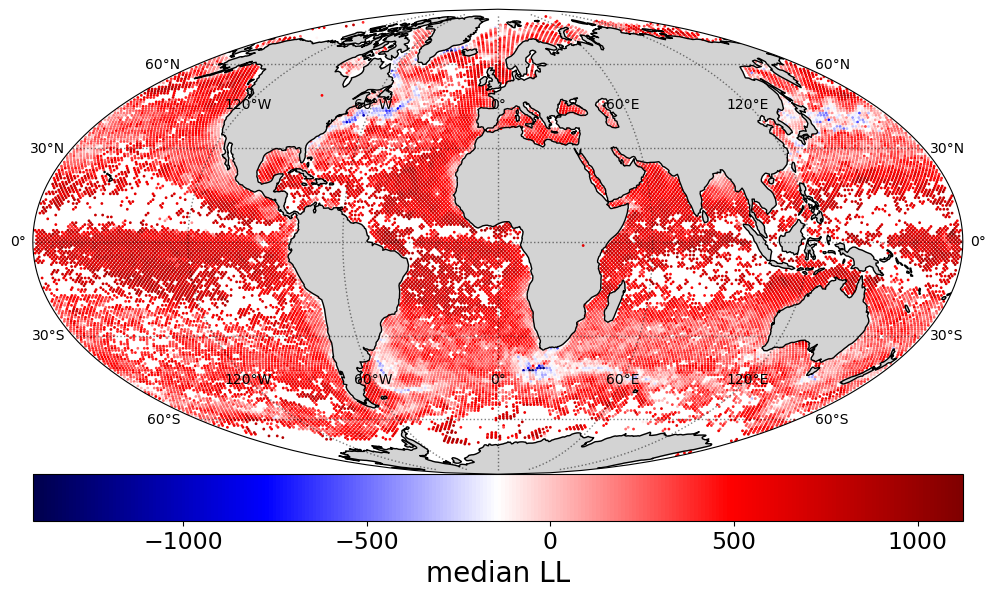

In [49]:
fig = plt.figure(figsize=(12,8)) # makes plot
color='seismic'
plt.clf()

tformM = ccrs.Mollweide()
tformP = ccrs.PlateCarree()

ax = plt.axes(projection=tformM)

cm = plt.get_cmap(color)
good = np.invert(LL_values.mask)
img = plt.scatter(x=hp_lons[good],
    y=hp_lats[good],
    c=LL_values[good], 
    cmap=cm,
    s=1,
    transform=tformP)

cb = plt.colorbar(img, orientation='horizontal', pad=0.)
clbl = 'median LL'
cb.set_label(clbl, fontsize=20.)
cb.ax.tick_params(labelsize=17)
ax.add_feature(cfeature.LAND, color='lightgray', zorder=0)
ax.coastlines(zorder=10)
ax.set_global()
    
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1,
                  color='black', alpha=0.5, linestyle=':', draw_labels=True)

gl.top_labels = True
gl.left_labels = True
gl.right_labels = True
gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black'}
gl.ylabel_style = {'color': 'black'}

plt.show()

In [92]:
hp_diff = viirs_LL_values - LL_values

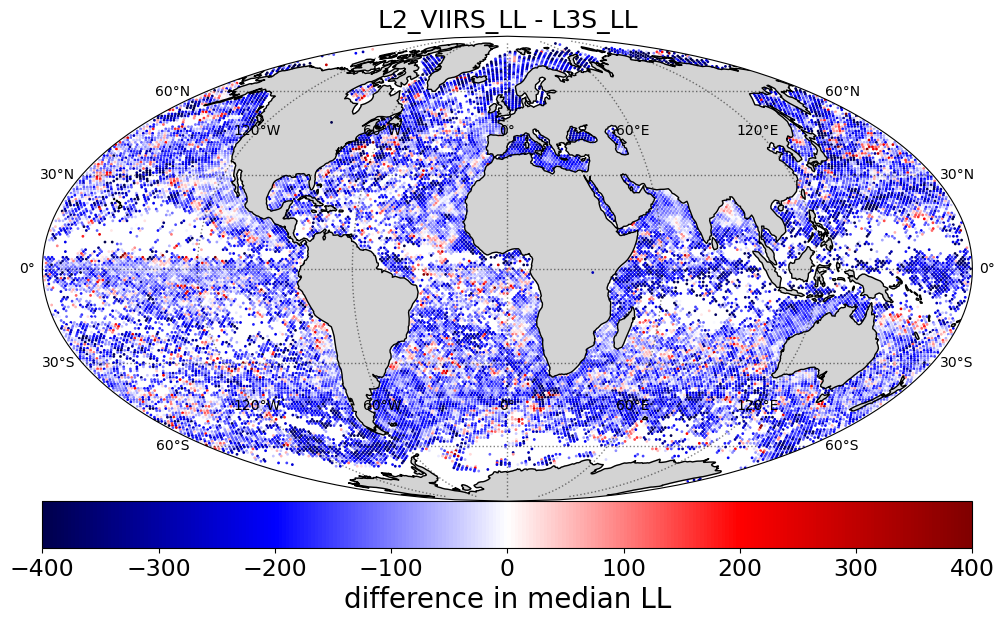

In [120]:
fig = plt.figure(figsize=(12,8)) # makes plot
color='seismic'
plt.clf()

tformM = ccrs.Mollweide()
tformP = ccrs.PlateCarree()

ax = plt.axes(projection=tformM)

cm = plt.get_cmap(color)
good = np.invert(hp_diff.mask)
img = plt.scatter(x=hp_lons[good],
    y=hp_lats[good],
    c=hp_diff[good], 
    vmin = -400, vmax = 400,
    cmap=cm,
    s=1,
    transform=tformP)

cb = plt.colorbar(img, orientation='horizontal', pad=0.)
clbl = 'difference in median LL'
cb.set_label(clbl, fontsize=20.)
cb.ax.tick_params(labelsize=17)
ax.coastlines(zorder=10)
ax.add_feature(cfeature.LAND, color='lightgray', zorder=0)
ax.set_global()
    
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1,
                  color='black', alpha=0.5, linestyle=':', draw_labels=True)

gl.top_labels = True
gl.left_labels = True
gl.right_labels = True
gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black'}
gl.ylabel_style = {'color': 'black'}

plt.title("L2_VIIRS_LL - L3S_LL", fontsize=18)
plt.show()
# this appears to be much more randomly scattered than the LLC paper version
# shrink color bar before saving

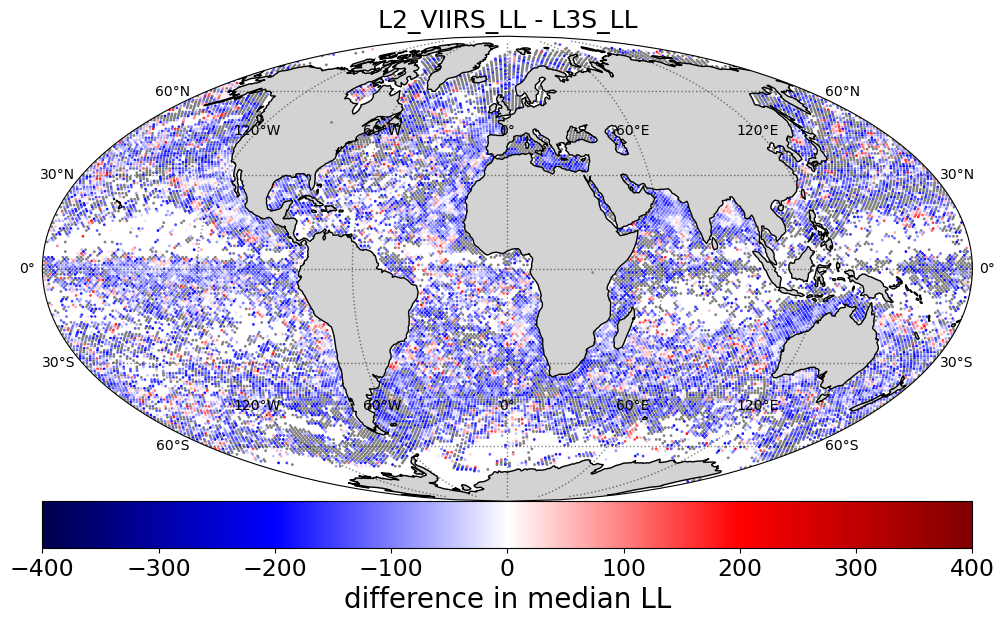

In [121]:
fig = plt.figure(figsize=(12,8))
color='seismic'
plt.clf()

tformM = ccrs.Mollweide()
tformP = ccrs.PlateCarree()

ax = plt.axes(projection=tformM)

cm = plt.get_cmap(color)
cm.set_bad(color="gray")

masked_hp_diff = np.ma.array(hp_diff, mask=~np.logical_and(hp_diff >= -197, hp_diff <= 197))

img = plt.scatter(
    x=hp_lons[good],
    y=hp_lats[good],
    c=masked_hp_diff[good],  # Use the masked array here
    vmin=-400,
    vmax=400,
    cmap=cm,
    s=1,
    transform=tformP
)

cb = plt.colorbar(img, orientation='horizontal', pad=0.)
clbl = 'difference in median LL'
cb.set_label(clbl, fontsize=20.)
cb.ax.tick_params(labelsize=17)
ax.coastlines(zorder=10)
ax.add_feature(cfeature.LAND, color='lightgray', zorder=0)
ax.set_global()
    
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1,
                  color='black', alpha=0.5, linestyle=':', draw_labels=True)

gl.top_labels = True
gl.left_labels = True
gl.right_labels = True
gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black'}
gl.ylabel_style = {'color': 'black'}

plt.title("L2_VIIRS_LL - L3S_LL", fontsize=18)
plt.show()

# right now it's doing the opposite of what I want: I want the gray values to be the ones in the middle and the extremities to be colored
# also the color bar is not showing this change